In [1]:
#Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [24]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')

C:\Users\Ali Haider\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [25]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [26]:
#shape of dataset
df.shape

(181691, 135)

In [27]:
#change the some columns names
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'State','natlty1_txt':'nationality_of_target','weaptype1_txt':'WeaponType','nkill':'Killed','nwound':'Wounded'},inplace=True)

In [28]:
#After renamed check again head
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [29]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [30]:
df.tail()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [32]:
#choose 20 columns
df=df[['Year','Month','Day','Country','Region','city','extended','latitude','longitude','vicinity','suicide','success','State','nationality_of_target','WeaponType','Killed','Wounded']]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   181691 non-null  int64  
 1   Month                  181691 non-null  int64  
 2   Day                    181691 non-null  int64  
 3   Country                181691 non-null  object 
 4   Region                 181691 non-null  object 
 5   city                   181257 non-null  object 
 6   extended               181691 non-null  int64  
 7   latitude               177135 non-null  float64
 8   longitude              177134 non-null  float64
 9   vicinity               181691 non-null  int64  
 10  suicide                181691 non-null  int64  
 11  success                181691 non-null  int64  
 12  State                  181270 non-null  object 
 13  nationality_of_target  180132 non-null  object 
 14  WeaponType             181691 non-nu

In [37]:
#Information which country have max attacks, or which regions have max attacks, or max people killed by single attack.
print('Country With Max Attacks:',df['Country'].value_counts().index[0])
print('Regions With Max Attacks:',df['Region'].value_counts().index[0])
print('Maximum number of people were killed by a single terrorist attack are',df['Killed'].max(),'people that took place in',df.loc[df['Killed'].idxmax()].Country)

Country With Max Attacks: Iraq
Regions With Max Attacks: Middle East & North Africa
Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in Iraq


In [38]:
#describe the 20 columns those select for analysis
df.describedescribe()

,Year,Month,Day,extended,latitude,longitude,vicinity,suicide,success,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,0.045346,23.498343,-4.586957e+02,0.068297,0.036507,0.889598,2.403272,3.167668
std,13.259430,3.388303,8.814045,0.208063,18.569242,2.047790e+05,0.284553,0.187549,0.313391,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,-9.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,11.510046,4.545640e+00,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,34.685087,6.871033e+01,0.000000,0.000000,1.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,1570.000000,8191.000000


In [54]:
#draw plot chart
#Filter Data to choose num of dead and injured people attacks from 1970 to 2017
df['Damage']=df['Killed']+df['Wounded']

damage = df[["Year","Damage"]].groupby('Year').sum()
year =  df["Year"].unique().tolist()


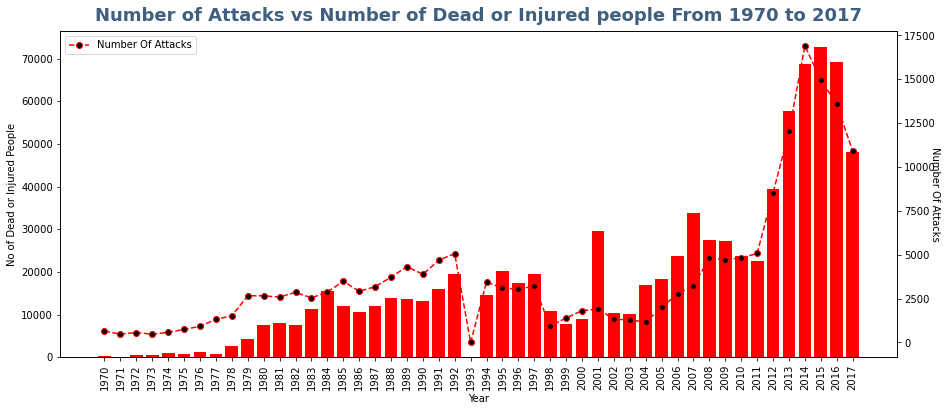

In [55]:
#bar chart
fig, ax1 = plt.subplots(figsize = (15,6))
ax1.bar(damage.index, [i[0] for i in damage.values], color= '#FF0000' )
ax1.set_xticklabels(np.arange(1970, 2018, step=1), rotation=90)
ax1.set_ylabel('No of Dead or Injured People', size = 10)
ax1.set_xlabel('Year', size = 10)
ax1.set_title('Number of Attacks vs Number of Dead or Injured people From 1970 to 2017', fontsize= 18, pad= 10, weight ='bold',color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
ax2 = ax1.twinx()

#Filter & get a number of attacked in the world from 1970 to 2017 
attack = []
for year in year:
    attack.append(len(df[df['Year'] == year][["Year"]]))
attack.insert(23, 0)

#draw plot chart
ax2.set_ylabel('Number Of Attacks', size = 10,rotation=-90)
ax2.plot(range(1970, 2018), attack, 'r--o', mfc='k', label='Number Of Attacks')

plt.xticks(np.arange(1970, 2018, step=1))
plt.legend(loc='upper left')
plt.show()


#This graph show, the number of attack increased significant from 2012 to 2015.

In [59]:
#Number of killed in regions
killed_region=df.groupby(['Region'],as_index=False)['Killed']
killed_region.sum()


,Region,Killed
0,Australasia & Oceania,150.0
1,Central America & Caribbean,28708.0
2,Central Asia,1000.0
3,East Asia,1152.0
4,Eastern Europe,7415.0
5,Middle East & North Africa,137642.0
6,North America,4916.0
7,South America,28849.0
8,South Asia,101319.0
9,Southeast Asia,15637.0


In [60]:
#Max killed in regions
killed_region.sum()

,Region,Killed
0,Australasia & Oceania,150.0
1,Central America & Caribbean,28708.0
2,Central Asia,1000.0
3,East Asia,1152.0
4,Eastern Europe,7415.0
5,Middle East & North Africa,137642.0
6,North America,4916.0
7,South America,28849.0
8,South Asia,101319.0
9,Southeast Asia,15637.0


In [65]:
#Country
df['Country'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
Andorra                    1
Wallis and Futuna          1
South Vietnam              1
Falkland Islands           1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

In [66]:
df['nationality_of_target'].value_counts()

Iraq                                  24113
Pakistan                              13900
India                                 12098
Afghanistan                           10931
Colombia                               7922
                                      ...  
Greenland                                 1
Man, Isle of                              1
Antigua and Barbuda                       1
People's Republic of the Congo            1
Commonwealth of Independent States        1
Name: nationality_of_target, Length: 215, dtype: int64

In [67]:
#sum of killed
df['Killed'].sum()

411868.0

In [74]:
#Total casualities according to region 
df['Casualities']=df['Killed']+df['Wounded']
df1=df.groupby('Region')['Casualities'].sum()
df2=df1.to_frame()
df2.reset_index()

,Region,Casualities
0,Australasia & Oceania,409.0
1,Central America & Caribbean,34530.0
2,Central Asia,2969.0
3,East Asia,10003.0
4,Eastern Europe,18239.0
5,Middle East & North Africa,329807.0
6,North America,26398.0
7,South America,43562.0
8,South Asia,234366.0
9,Southeast Asia,40841.0


Text(0, 0.5, 'Casualities')

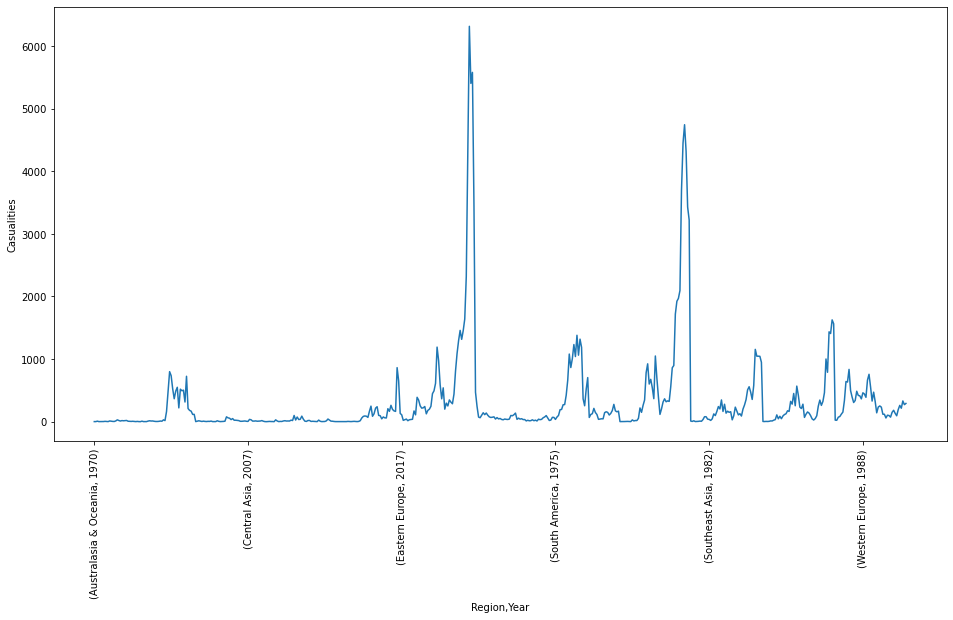

In [75]:
#Plot year and region casulatity
plt.subplots(figsize=(16,8))
df.groupby(['Region', 'Year']).count()['Casualities'].plot()
plt.xticks(rotation=90)
plt.ylabel("Casualities")

<ipython-input-78-11e7d470eb24>:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


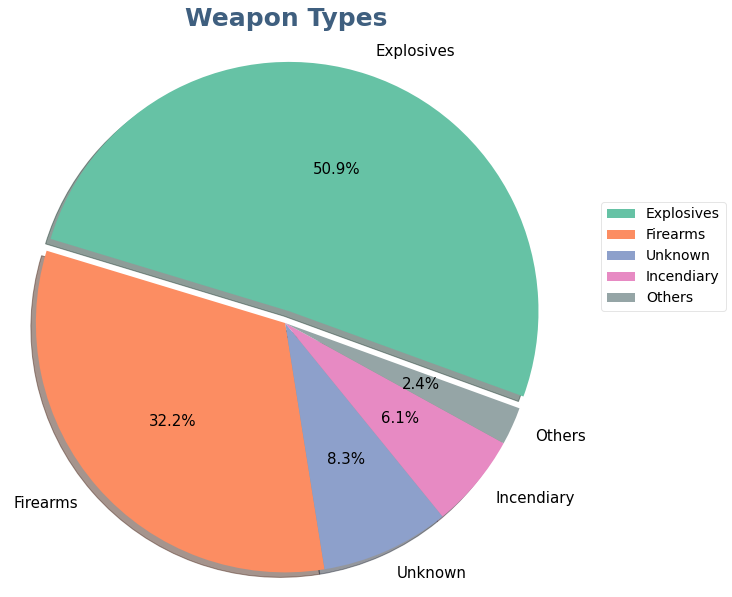

In [78]:
#weapon type analysis
weaptype_ =df['WeaponType'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown',
                                                               'Incendiary'] else 'Others')
weaptype = weaptype_.value_counts().tolist()

# Pie chart
weapon_labels = ['Explosives','Firearms','Unknown','Incendiary','Others']

weapon_sizes = []

for j in weaptype:
    percent = j*100/len(df['WeaponType'])
    weapon_sizes.append(percent)

fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(weapon_sizes, labels=weapon_labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8)[:4:1]+
                                   [(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

ax.axis('equal')
plt.title('Weapon Types', fontsize= 25, pad= 20, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph

ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.2,0.5,0.1,1), prop={'size': 14})
fig.show()

In [81]:
#Weapon types and number of Dead or Injured People
table = df[['WeaponType','Damage']].groupby('WeaponType',as_index = False).sum().sort_values(by='Damage', 
                                                                                             ascending=False)
df_count = df['WeaponType'].value_counts()
df_count = df_count.reindex(table['WeaponType'].values)
table['Weapon Count'] = df_count.values
table["Weapon Damage Rate"] = table["Damage"]/table["Weapon Count"]
table

,WeaponType,Damage,Weapon Count,Weapon Damage Rate
2,Explosives,537788.0,92426,5.818579
4,Firearms,225473.0,58524,3.852659
10,Unknown,50167.0,15157,3.309824
11,Vehicle (not to include vehicle-borne explosiv...,20297.0,136,149.242647
6,Melee,14489.0,3655,3.964159
1,Chemical,14377.0,321,44.788162
5,Incendiary,8898.0,11135,0.799102
0,Biological,814.0,35,23.257143
9,Sabotage Equipment,357.0,141,2.531915
7,Other,225.0,114,1.973684


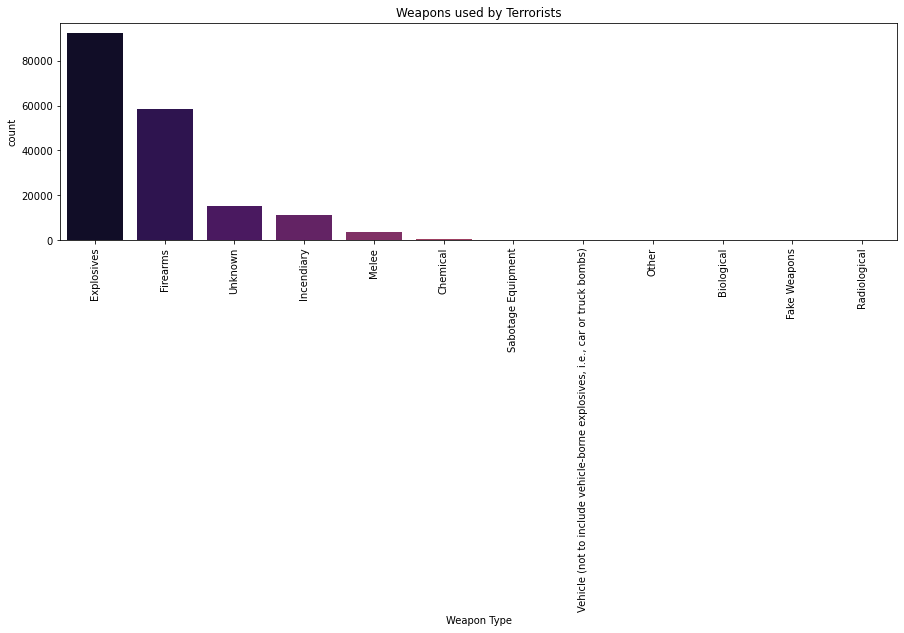

In [82]:
#Weapoon used in attacks
plt.subplots(figsize=(15,4))
sns.countplot('WeaponType',data=df,palette='inferno',order=df['WeaponType'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Weapon Type')
plt.title('Weapons used by Terrorists')
plt.show()

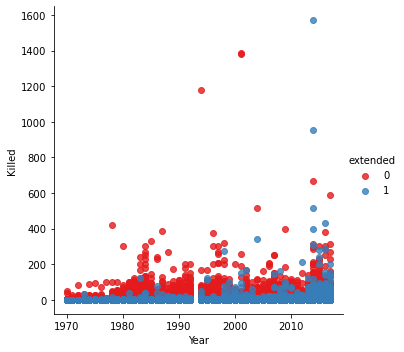

In [83]:
#
sns.lmplot(x='Year',y='Killed',data=df,fit_reg=False,hue='extended',legend=True,palette="Set1")

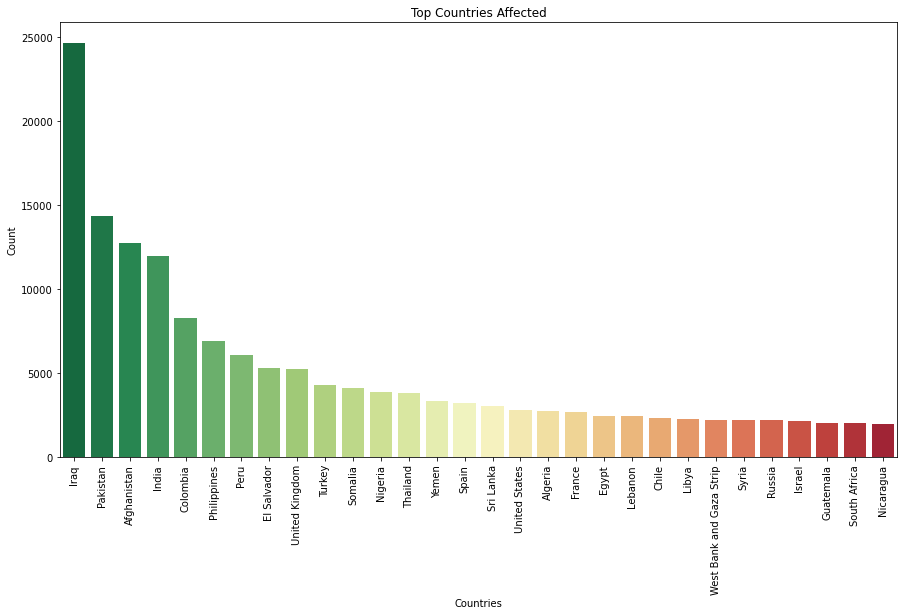

In [84]:
#top countries affected by attack
plt.subplots(figsize=(15,8))
sns.barplot(df['Country'].value_counts()[:30].index,df['Country'].value_counts()[:30].values,palette='RdYlGn_r')
plt.title('Top Countries Affected')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.show()

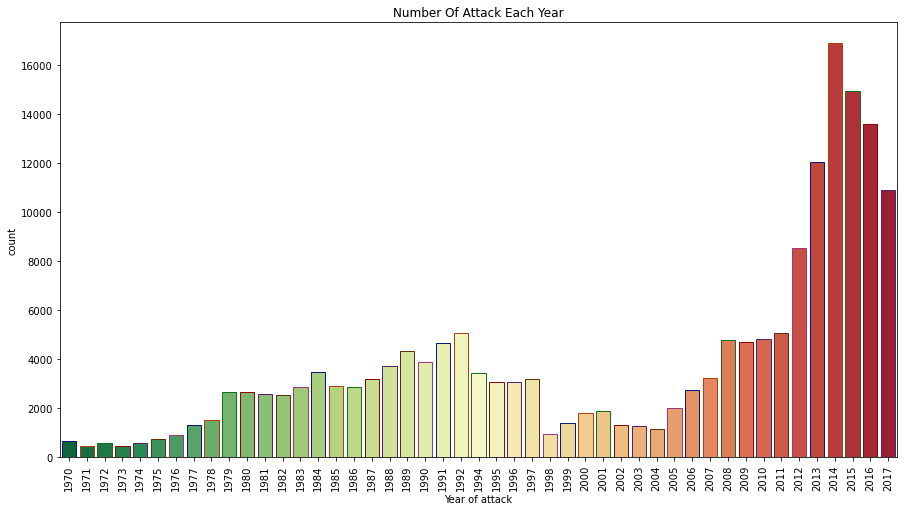

In [85]:
#number of attack each year
plt.subplots(figsize=(15,8))
sns.countplot('Year',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Attack Each Year')
plt.show()

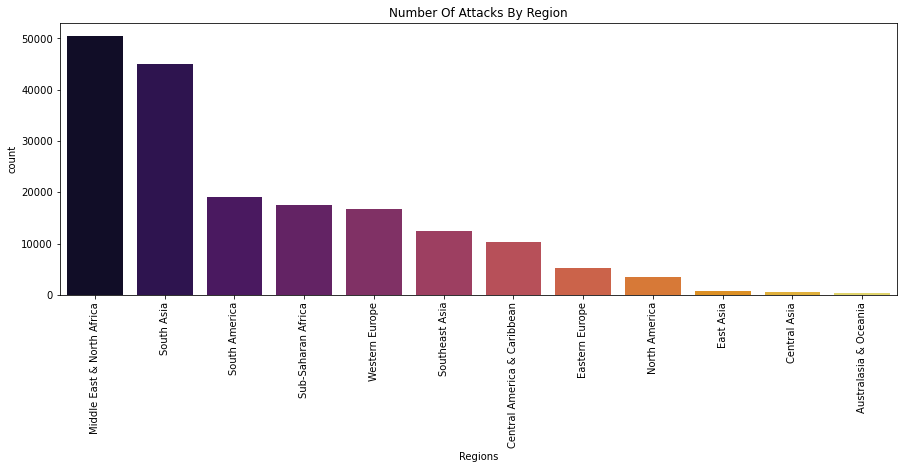

In [86]:
#number of attacks by region
plt.subplots(figsize=(15,5))
sns.countplot('Region',data=df,palette='inferno',order=df['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Attacks By Region')
plt.show()

In [88]:
#identify safest country from 1947 to 2017 
country_damage = df[df['Year'] > 1948][["Country", "Damage"]].groupby('Country',as_index=False).sum()
country_damage[country_damage["Damage"]==0]

,Country,Damage
3,Andorra,0.0
5,Antigua and Barbuda,0.0
57,Falkland Islands,0.0
79,Iceland,0.0
126,New Hebrides,0.0
153,Seychelles,0.0
192,Vanuatu,0.0
196,Wallis and Futuna,0.0


After analysis:
Country With Max Attacks: Iraq
Regions With Max Attacks: Middle East & North Africa
Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in Iraq